In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = '/content/education-connectivity-dataset.csv'
data = pd.read_csv(file_path, encoding='latin1')
print("Column Names in Dataset:")
print(data.columns)

Column Names in Dataset:
Index(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
 

<ipython-input-4-c84d45e2a852>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)
<ipython-input-4-c84d45e2a852>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(data_scaled)


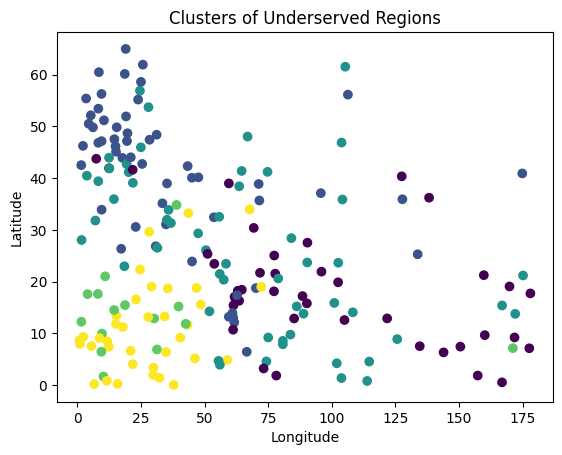

Regression Model R^2 Score: 0.97
Predicted Demand Scores for Sample Regions: [ 89.596  257.9786 299.3397 121.7632 400.8736]


In [4]:
features = [
    "Latitude ", "Longitude",
    "OOSR_Primary_Age_Male", "OOSR_Primary_Age_Female",
    "Youth_15_24_Literacy_Rate_Male", "Youth_15_24_Literacy_Rate_Female",
    "Gross_Primary_Education_Enrollment", "Gross_Tertiary_Education_Enrollment",
    "Birth_Rate", "Unemployment_Rate"
]
data = data[features]
data.fillna(data.mean(), inplace=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
plt.scatter(data['Longitude'], data['Latitude '], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Underserved Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
data['Demand_Score'] = (
    data["OOSR_Primary_Age_Male"] +
    data["OOSR_Primary_Age_Female"] +
    (100 - data["Youth_15_24_Literacy_Rate_Male"]) +
    (100 - data["Youth_15_24_Literacy_Rate_Female"]) +
    (100 - data["Gross_Primary_Education_Enrollment"]) +
    (100 - data["Gross_Tertiary_Education_Enrollment"]) +
    data["Birth_Rate"] +
    data["Unemployment_Rate"]
)
X = data[features]
y = data['Demand_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
print(f"Regression Model R^2 Score: {score:.2f}")
import joblib
joblib.dump(regressor, 'education_connectivity_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
predicted_demand = regressor.predict(X_test[:5])
print("Predicted Demand Scores for Sample Regions:", predicted_demand)